<a href="https://colab.research.google.com/github/AaminSingh/Machine-Learning-basics/blob/main/Experiment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aamin Simmi Singh


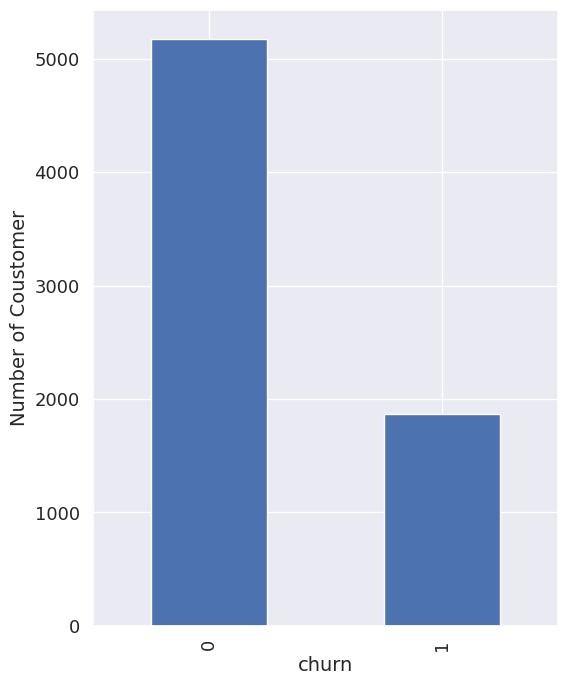

In [ ]:
name = "Aamin Simmi Singh"
print(name);
ax = df["Churn"].value_counts().plot(kind = 'bar', figsize = (6,8), fontsize = 13)
ax.set_ylabel("Number of Coustomer", fontsize = 14);
ax.set_xlabel("churn", fontsize = 14);

In [ ]:
import pandas as pd

# Replace '/path/to/your/dataset.csv' with the actual path to your dataset file
df = pd.read_csv('/content/drive/MyDrive/telco_churn.csv')

# Display the first few rows to verify the data is loaded correctly
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


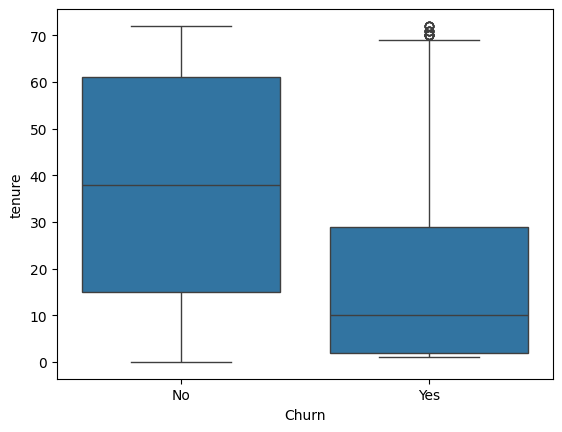

In [ ]:
import seaborn as sns
sns.boxplot(x='Churn', y='tenure', data=df)
sns.set(rc ={'figure.figsize':(10,8)})

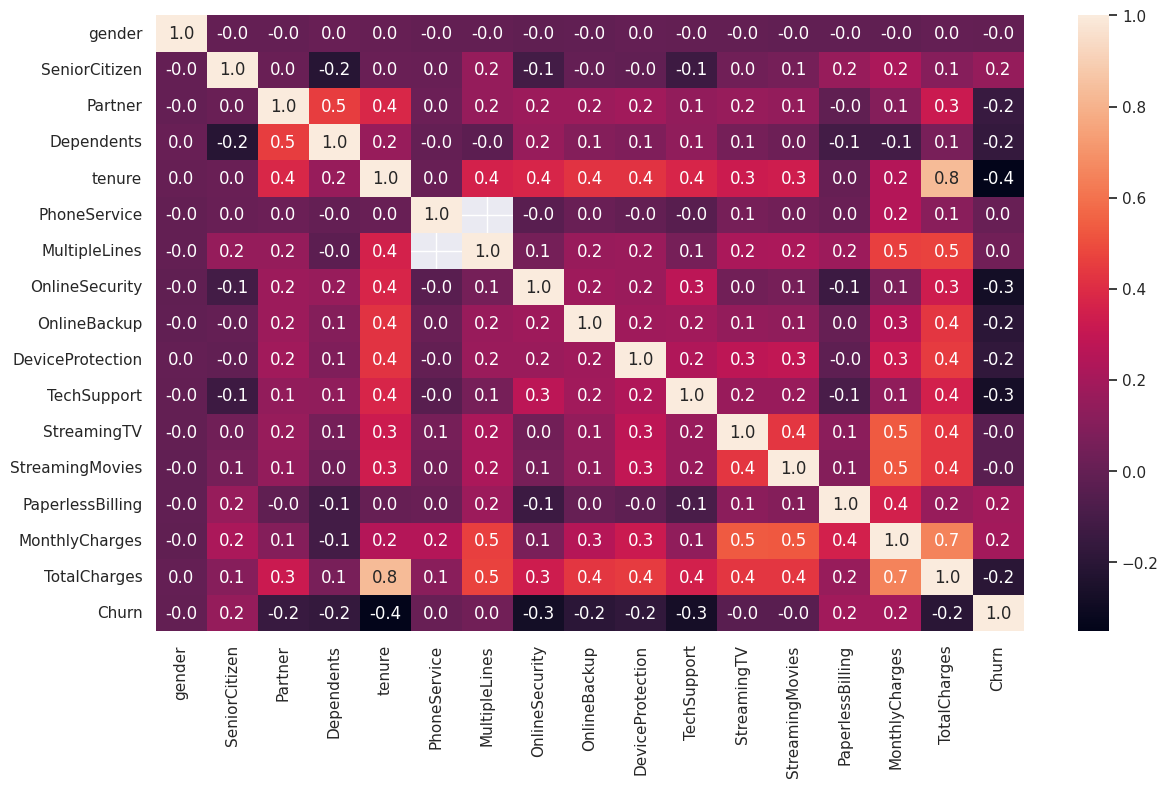

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert 'TotalCharges' to numeric, coercing errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Convert binary categorical columns to numeric (0 and 1)
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))

# Convert 'gender' column to numeric (0 for Female, 1 for Male)
if 'gender' in df.columns:
    df['gender'] = df['gender'].apply(lambda x: 0 if x == 'Female' else (1 if x == 'Male' else x))


plt.figure(figsize =(14,8))
# Drop 'customerID' and other non-binary categorical columns before calculating correlation
cols_to_drop = ['customerID', 'InternetService', 'Contract', 'PaymentMethod']
df_numeric = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

# Ensure all remaining columns are numeric before calculating correlation
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

sns.heatmap(df_numeric.corr(),annot = True,fmt=".1f")
plt.show()

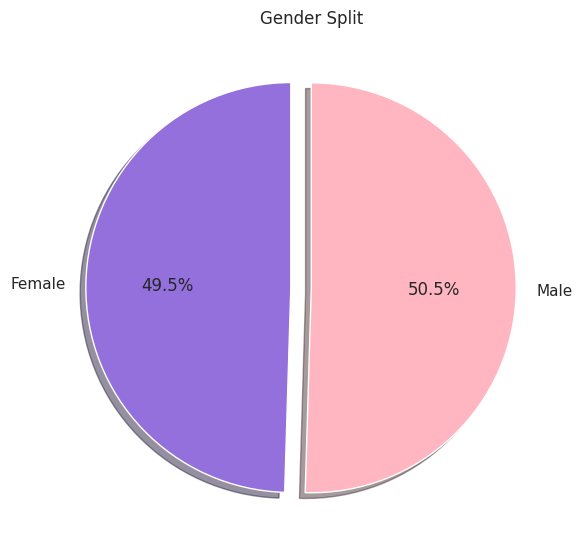

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Get counts for each gender (0 and 1)
gender_counts = Counter(df["gender"])

# Create labels based on the numeric gender values (0=Female, 1=Male)
# Ensure the order of labels matches the order of counts
labels = ['Female', 'Male'] # Assuming 0 corresponds to Female and 1 to Male based on previous conversion
values = [gender_counts[0], gender_counts[1]] # Get counts for 0 (Female) and 1 (Male)

colors = ['mediumpurple','lightpink']

fig = plt.figure(figsize = [6,6])

plt.pie(values, labels=labels, startangle=90, explode=(0.1, 0), autopct="%1.1f%%", shadow=True, colors=colors)
plt.tight_layout()
plt.title("Gender Split")
plt.show()

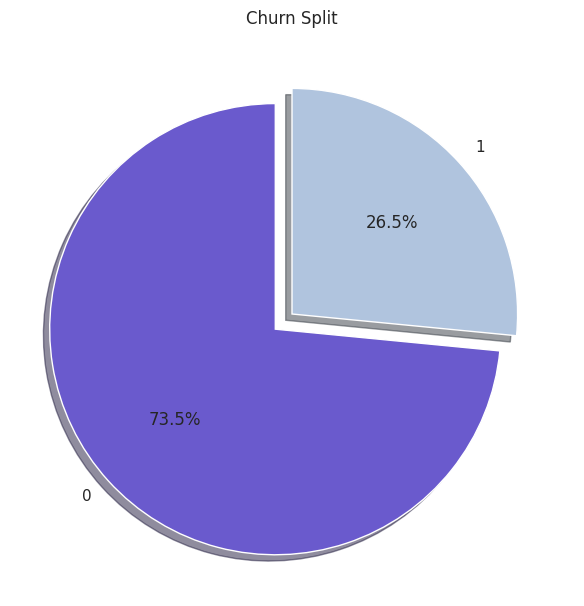

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# Get counts for Churn
churn_counts = Counter(df["Churn"])

# Unpack counts and labels
labels = churn_counts.keys()
values = churn_counts.values()

colors = ['slateblue', 'lightsteelblue']

fig = plt.figure(figsize=[6,6])

plt.pie(values, labels=labels, startangle=90, explode=(0.1, 0), autopct="%1.1f%%", shadow=True, colors=colors)
plt.tight_layout()
plt.title("Churn Split")
plt.show()

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

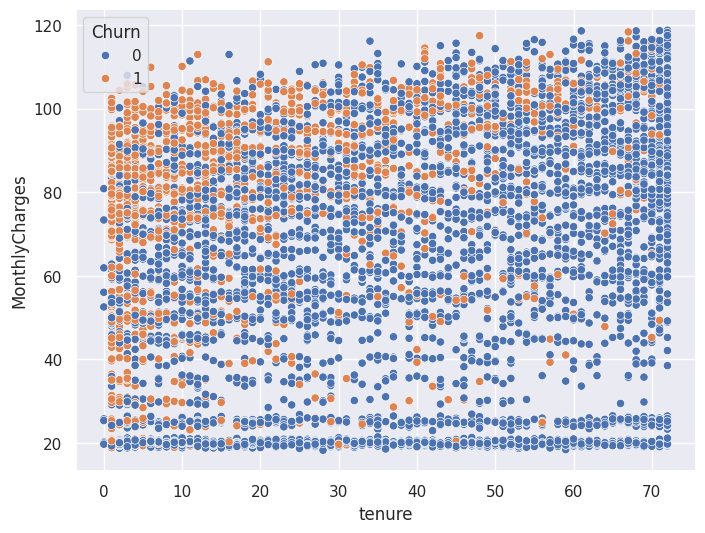

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'tenure', y = 'MonthlyCharges', hue = "Churn", data = df)

# Task
Explain the error in the selected code. If possible, fix the error and incorporate the changes into the existing code. Otherwise, try to diagnose the error.

## Prepare data for modeling

### Subtask:
Select features (X) and target variable (y) from the DataFrame.


**Reasoning**:
Define the features and target variables for the machine learning model.



In [ ]:
X = df_numeric.drop('Churn', axis=1)
y = df_numeric['Churn']

## Split data into training and testing sets

### Subtask:
Divide the data into training and testing sets using `train_test_split`.


**Reasoning**:
Import the train_test_split function and split the data into training and testing sets.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train a machine learning model

### Subtask:
Choose and train a suitable classification model (e.g., Logistic Regression, RandomForestClassifier) on the training data.


**Reasoning**:
The goal is to train a classification model. I will use Logistic Regression as it's a common and interpretable model for binary classification.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values using the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the Logistic Regression model on the imputed data
model = LogisticRegression()
model.fit(X_train_imputed, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Reasoning**:
The traceback indicates that the training data `X_train` contains NaN values, which LogisticRegression cannot handle directly. I need to address the missing values before training the model. I will use a simple imputation strategy by filling NaN values with the mean of the respective columns in the training data.



## Make predictions

### Subtask:
Use the trained model to predict churn on the test data.


**Reasoning**:
Use the trained logistic regression model to predict churn probabilities on the imputed test data.



In [ ]:
y_pred = model.predict(X_test_imputed)

## Calculate accuracy

### Subtask:
Use the `y_test` and `y_pred` to calculate and print the accuracy.


**Reasoning**:
Calculate the accuracy score using the true test labels and the predicted labels.



In [ ]:
from sklearn.metrics import accuracy_score

accuracy1 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy1)

Accuracy: 0.8140525195173882


In [ ]:
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Precision: 0.6773162939297125
Recall: 0.5683646112600537


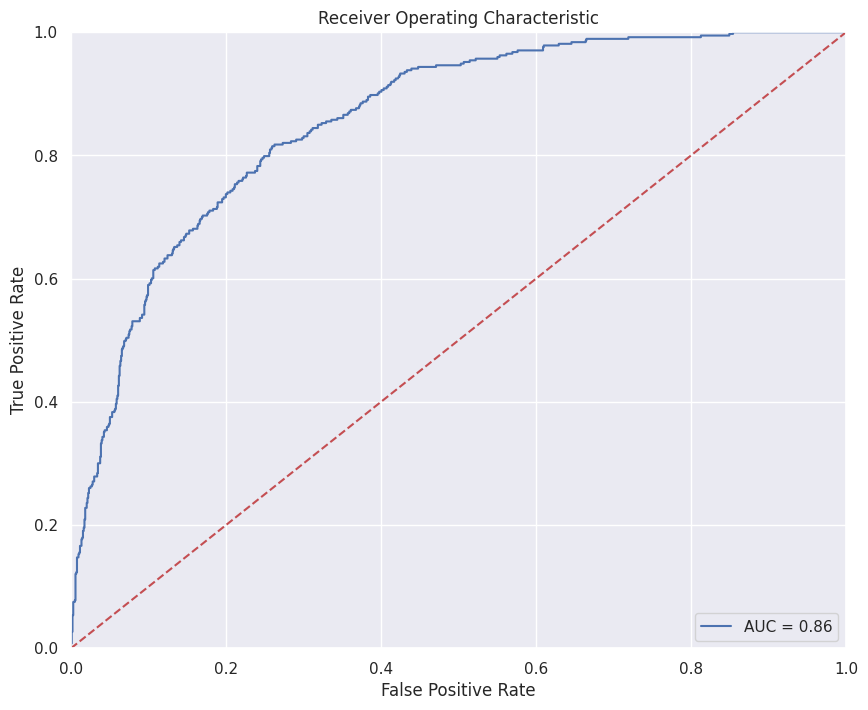

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class (churn = 1)
y_pred_proba = model.predict_proba(X_test_imputed)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"AUC: {roc_auc:.2f}")

AUC: 0.86
